# ライブラリ

In [ ]:
# ライブラリのインポート
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

print("GPU使用可：" , tf.test.gpu_device_name())

GPU使用可： /device:GPU:0


# ファイルをアップロード

In [ ]:
# Google Colabでファイルをアップロードする場合の処理
from google.colab import files
uploaded = files.upload()

Saving fer2013.zip to fer2013.zip


In [ ]:
# zipファイルを展開する
!unzip fer2013.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating: train/sad/Trainin

# 表情モデル構築

In [ ]:
# ハイパーパラメータ
batch_size = 64            # バッチサイズ
epochs = 30                # 学習エポック数
learning_rate = 0.001      # 学習率
input_shape = (48, 48, 1)  # 画像サイズ（縦×横×チャンネル）
num_classes = 7            # 分類する感情の種類（7種類）

データの準備

In [ ]:
# fer2013フォルダの中のtrain, testディレクトリを使う
train_dir = "train"
test_dir = "test"

# 訓練データ用ImageDataGenerator（データ拡張付き）
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# テストデータ用ImageDataGenerator（正規化のみ）
test_datagen = ImageDataGenerator(rescale=1./255)

# 画像データの読み込み（訓練データ）
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# 画像データの読み込み（テストデータ）
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


CNNモデルの作成

In [ ]:
# CNNモデルを構築する関数
def build_emotion_model(input_shape, num_classes, learning_rate=0.001):
    model = models.Sequential()

    # 畳み込み＋正規化＋プーリング（3層）
    model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))

    # 全結合層
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# モデルを取得し、コンパイルする関数
def get_model(input_shape, num_classes, learning_rate):
    model = build_emotion_model(input_shape, num_classes)
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# モデル構築・学習
model = get_model(input_shape, num_classes, learning_rate)

# モデル学習
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

# モデル評価
score = model.evaluate(test_generator)
print("正解率 =", score[1], "loss =", score[0])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - accuracy: 0.2168 - loss: 2.1847 - val_accuracy: 0.2267 - val_loss: 1.8357
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.2648 - loss: 1.7815 - val_accuracy: 0.2940 - val_loss: 1.7427
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.2980 - loss: 1.7221 - val_accuracy: 0.3948 - val_loss: 1.5719
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.3427 - loss: 1.6528 - val_accuracy: 0.3796 - val_loss: 1.5464
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.3642 - loss: 1.5988 - val_accuracy: 0.3362 - val_loss: 1.6461
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.3900 - loss: 1.5556 - val_accuracy: 0.4352 - val_loss: 1.4577
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.4085 - loss: 1.5162 - val_accuracy: 0.4104 - val_loss: 1.5165
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.4215 - loss: 1.4835 - 

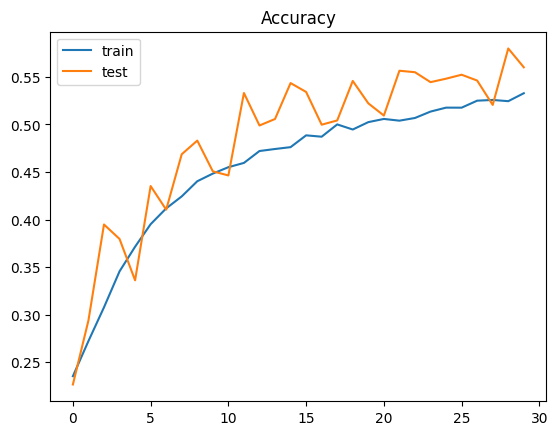

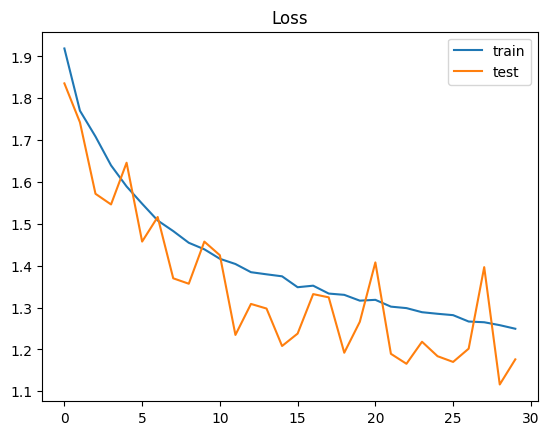

In [ ]:
# 学習結果の可視化（正解率）
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["train", "test"])
plt.show()

# 学習結果の可視化（損失）
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["train", "test"])
plt.show()

In [ ]:
# モデルの保存
model.save("emotion_model_fer2013.keras")
print("✅ モデルは 'emotion_model_fer2013.keras' として保存されました。")

✅ モデルは 'emotion_model_fer2013.keras' として保存されました。


In [ ]:
# Colabでダウンロード用リンク作成
files.download("emotion_model_fer2013.keras")